<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/SeriesdeTiempo/Operadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mjuez/pytsdatasets/master/pytsdatasets/data/airpassengers.csv')

In [2]:
data

,date,data
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [3]:
data['L.data']=data['data'].shift()

In [4]:
data

,date,data,L.data
0,1949-01-01,112,NaN
1,1949-02-01,118,112.0
2,1949-03-01,132,118.0
3,1949-04-01,129,132.0
4,1949-05-01,121,129.0
...,...,...,...
139,1960-08-01,606,622.0
140,1960-09-01,508,606.0
141,1960-10-01,461,508.0
142,1960-11-01,390,461.0


In [5]:
data['Diff.data']=data['data'].diff()

In [6]:
data

,date,data,L.data,Diff.data
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,112.0,6.0
2,1949-03-01,132,118.0,14.0
3,1949-04-01,129,132.0,-3.0
4,1949-05-01,121,129.0,-8.0
...,...,...,...,...
139,1960-08-01,606,622.0,-16.0
140,1960-09-01,508,606.0,-98.0
141,1960-10-01,461,508.0,-47.0
142,1960-11-01,390,461.0,-71.0


In [7]:
(432-390)/390*100

10.76923076923077

In [8]:
(data['data'][-1:]/data['data'].shift()[-1:]-1)*100

,data
143,10.769231


In [9]:
import numpy as np
data['Log.data']=np.log(data['data'])

In [10]:
# La diferencia logarítmica es una aproximación del cambio porcentual
(data['Log.data'][-1:]-data['Log.data'].shift()[-1:])*100

,Log.data
143,10.227885


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
def graficar(variable):
    fig = sns.lineplot(x=data.index, y=variable)
    plt.title(variable.name)
    plt.xlabel("Año")
    plt.savefig('%s.png'%variable.name)
    return fig

In [12]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

<Axes: title={'center': 'data'}, xlabel='Año', ylabel='data'>

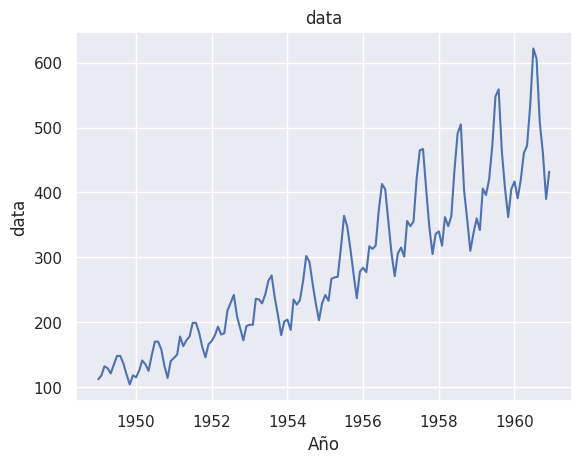

In [13]:
graficar(data['data'])

<Axes: title={'center': 'Log.data'}, xlabel='Año', ylabel='Log.data'>

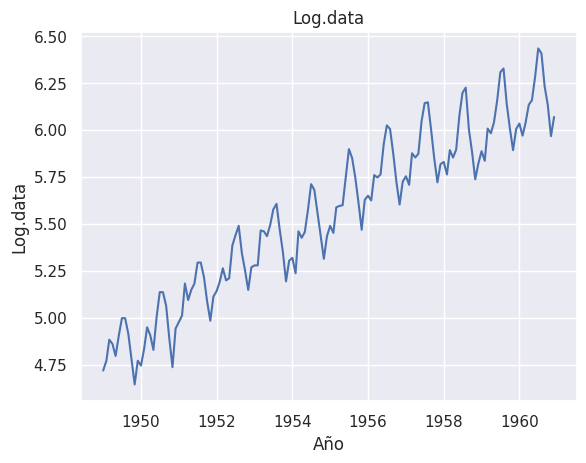

In [14]:
graficar(data['Log.data'])

<Axes: title={'center': 'data'}, xlabel='Año', ylabel='data'>

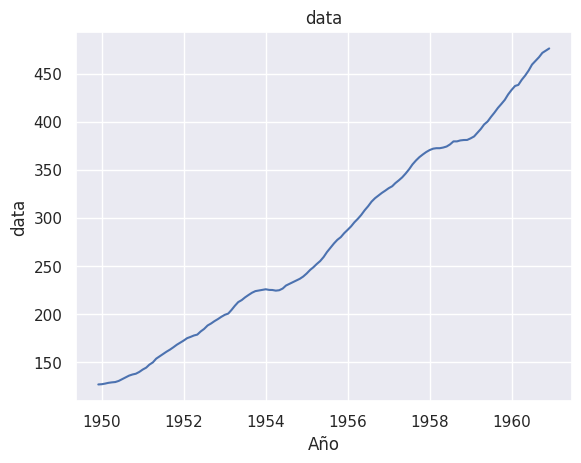

In [15]:
graficar(data['data'].rolling(window=12).mean())